<a href="https://colab.research.google.com/github/Vishnukvsvk/ML-Using-Python-IBM/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing** **Required** **Packages**

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
%matplotlib inline

#**Getting Dataset**

In [4]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-05-08 05:50:51--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.03s   

2020-05-08 05:50:52 (2.73 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



#**Data Exploration**

In [5]:
df=pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


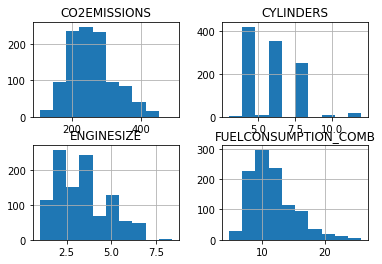

In [16]:
cdf.hist()
plt.show()

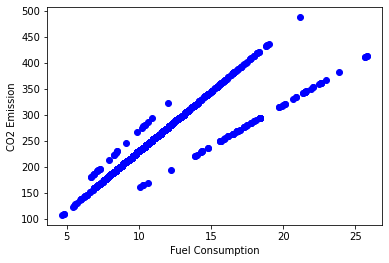

In [14]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,color='blue')
plt.xlabel('Fuel Consumption')
plt.ylabel('CO2 Emission')
plt.show()

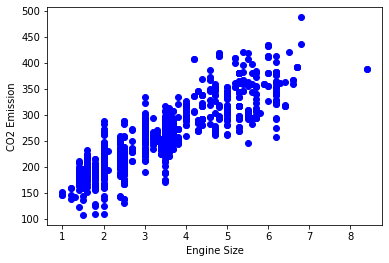

In [18]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')
plt.show()

#**Train and Test Dataset**

In [0]:
msk=np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#**Simple Regression Model**

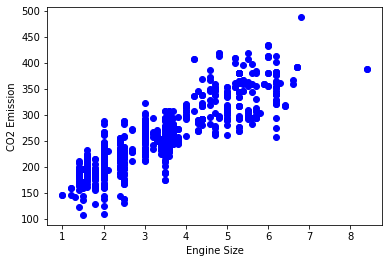

In [20]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')
plt.show()

In [21]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)

#Coefficients   --> y= a0 + a1x
print('Coefficients: ',regr.coef_)
print('Intercept: ',regr.intercept_) 

Coefficients:  [[39.30619953]]
Intercept:  [124.78626502]


Text(0, 0.5, 'CO2 Emissions')

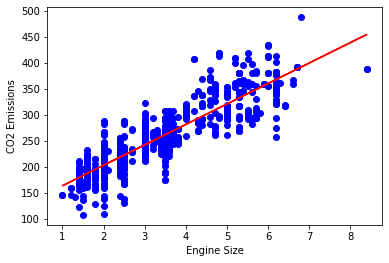

In [23]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.plot(train_x,regr.coef_[0][0]*train_x+regr.intercept_[0],'-r')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')

#**Prediction using Test Data**

In [25]:
from sklearn.metrics import r2_score

test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 21.59
Residual sum of squares (MSE): 841.23
R2-score: 0.70


#**Using FuelConsumption_Comb as Independent Variable(X)**
***Second Example***

In [26]:
from sklearn import linear_model

regr2=linear_model.LinearRegression()
train_x2= np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y2= np.asanyarray(train[['CO2EMISSIONS']])
regr2.fit(train_x2,train_y2)

print('Coeff: ',regr2.coef_)
print('Intercept: ',regr2.intercept_)


Coeff:  [[15.97649092]]
Intercept:  [70.81135653]


Text(0, 0.5, 'CO2 Emmisions')

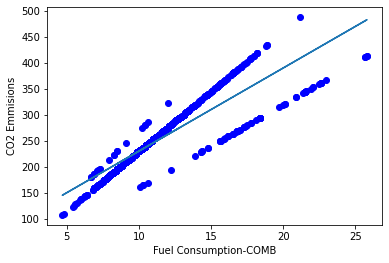

In [27]:
plt.scatter(train.FUELCONSUMPTION_COMB,train.CO2EMISSIONS,color='blue')
plt.plot(train_x2,regr2.coef_[0][0]*train_x2+regr2.intercept_[0])
plt.xlabel('Fuel Consumption-COMB')
plt.ylabel('CO2 Emmisions')

In [29]:
from sklearn.metrics import r2_score

test_x2=np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y2=np.asanyarray(test[['CO2EMISSIONS']])
test_y_2 = regr.predict(test_x2)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_2 - test_y2)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_2 - test_y2) ** 2))
print("R2-score: %.2f" % r2_score(test_y_2 , test_y2) )

Mean absolute error: 315.11
Residual sum of squares (MSE): 104603.01
R2-score: -6.01
